In [1]:
import simtf
# %aimport simtf
import importlib
# iPython's extension for auto reloading modules
%load_ext autoreload
# set '%autoreload 0' to disable autoreloading modules
# see options: '%autoreload?'
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import plotsettings
%config InlineBackend.figure_format = 'svg'

In [4]:
# simtf = importlib.reload(simtf)
# simtf.histogram(pd.Series())

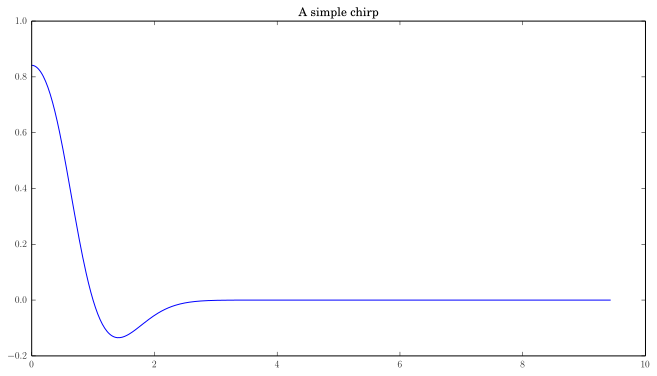

In [12]:
# plotsettings = importlib.reload(plotsettings)
# %config InlineBackend.figure_format = 'svg'
# %config InlineBackend.figure_format = 'png'
# %config InlineBackend.figure_format = 'pdf
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin((1-x*x)*np.exp(-x**2)))
plt.title('A simple chirp')
plt.show()

In [31]:
def func(a1, b2='test', *args, **kwargs):
    print(a1)
    print(b2)
    print(kwargs['f'])

def funcix(a1, b2='test', *, ha, hb=None):
    print(a1)
    print(b2)
    print(ha)
    print(hb)

# func('ax', 'byx', f=11)
# funcix('ax', 'byx', ha=2, hb=42)
funcix('ax', 'byx', ha=2)
del func, funcix

In [42]:
h = {'a': 42, 'b': 12}
l = [256]
def func(a=None, **kwargs):
    print(locals())
func()
func(*l)
func(**h)
del func, h, l

{'kwargs': {}, 'a': None}
{'kwargs': {}, 'a': 256}
{'kwargs': {'b': 12}, 'a': 42}


In [87]:
n_bins = 5
df = pd.DataFrame(
    [
        (0.3, 0.4, 0.5, 0.6, ),
#         (0.0, 1.0, 0.0, 1.0),
#         (0.1, 1.0, 0.1, 1.0),
#         (1.0, 1.0, 1.0, 1.0),
#         (0.0, 1.1, 0.0, 1.1),
#         (1.1, 1.1, 1.1, 1.1),
    ] * n_bins,
    columns=[
        'first',
        'second',
        'third',
        'fourth',
    ],
)
df[['first']] += 0.5
# df['first'] += 0.5
df['first'][2] += 0.3
df
del df
_

,first,second,third,fourth
0,0.8,0.4,0.5,0.6
1,0.8,0.4,0.5,0.6
2,1.1,0.4,0.5,0.6
3,0.8,0.4,0.5,0.6
4,0.8,0.4,0.5,0.6


In [94]:
ts = pd.Series([0.0, 1.0, 2.0, 3.0, 18.0])
for t in ts.iteritems():
    print(t)
print()
for t in ts:
    print(t)

(0, 0.0)
(1, 1.0)
(2, 2.0)
(3, 3.0)
(4, 18.0)

0.0
1.0
2.0
3.0
18.0


## Useful links ##

* [Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Pyplot API](http://matplotlib.org/api/pyplot_api.html)

In [44]:
# ts = pd.Series(
#     npr.uniform(0., 42.0, 1000000)
# )

hist = simtf.histogram(
    ts,
    type='means',
    logscale=True,
    n_bins=10,
)

hist_lin = simtf.histogram(
    ts,
    type='means',
    logscale=False,
    n_bins=10,
)

In [94]:
hist_spline = simtf.cubic_spline(xi=hist['mean'].as_matrix(),
                   yi=hist['n_delta_normalized'].as_matrix(),
                   logscale=True)
x_hist = np.logspace(math.log(min_x), math.log(max_x), 100, True, base=math.exp(1.0))
y_hist = np.vectorize(hist_spline)(x_hist)

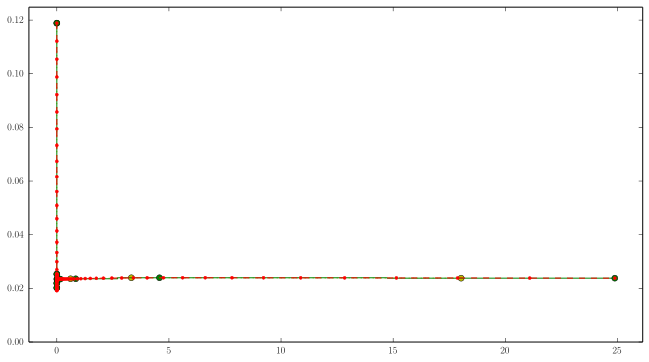

In [100]:
# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(hist['coo'], y, 'y:o')
# plt.plot(hist_lin['mean'], hist_lin['n_normalized'], 'ro-', drawstyle='steps-mid')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.plot(x_hist, y_hist, 'r.--', drawstyle='steps-mid')
plt.show()

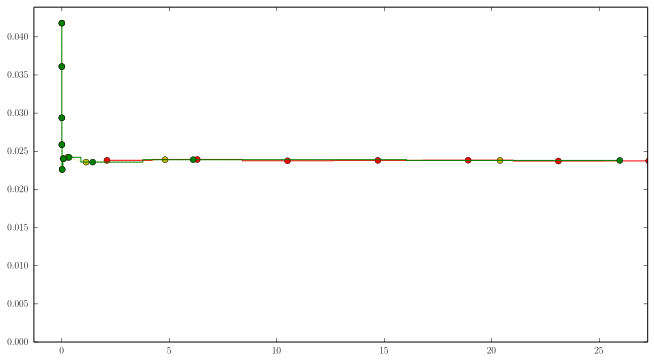

In [153]:
# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(hist['coo'], y, 'y:o')
plt.plot(hist_lin['mean'], hist_lin['n_delta_normalized'], 'ro-', drawstyle='steps-mid')
# plt.plot(hist_lin['mean'], hist_lin['n_normalized'], 'ro-', drawstyle='steps-mid')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.show()

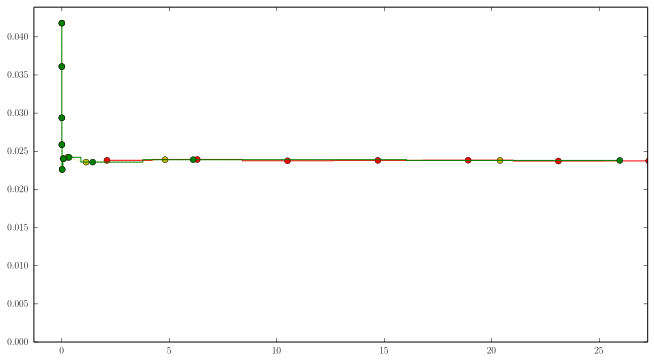

In [150]:
# ts = pd.Series(
#     npr.uniform(0., 42.0, 1000000)
# )

hist = simtf.histogram(
    ts,
    type='discrete',
    logscale=True,
    n_bins=10,
)

hist_lin = simtf.histogram(
    ts,
    type='discrete',
    logscale=False,
    n_bins=10,
)

# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(hist['coo'], y, 'y:o')
plt.plot(hist_lin['mean'], hist_lin['n_delta_normalized'], 'ro-', drawstyle='steps-mid')
# plt.plot(hist_lin['mean'], hist_lin['n_normalized'], 'ro-', drawstyle='steps-mid')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.show()

In [141]:
# mean
print(hist['n_normalized'].sum())
hist

1000000


,coo,mean,n_normalized,n_delta_normalized
0,0.000046,0.000055,3,0.041791
1,0.000193,0.000287,11,0.036101
2,0.000821,0.001098,38,0.029381
3,0.003486,0.004600,142,0.025866
4,0.014796,0.018764,527,0.022616
5,0.062803,0.079455,2376,0.024023
6,0.266576,0.340290,10161,0.024203
7,1.131507,1.437289,42010,0.023575
8,4.802794,6.109198,180750,0.023897
9,20.385942,25.956447,763982,0.023796


In [144]:
# discrete
print(hist['n_normalized'].sum())
hist

1000000.0


,coo,mean,n_normalized,n_delta_normalized
0,0.000046,0.000055,3,0.041791
1,0.000193,0.000287,11,0.036101
2,0.000821,0.001098,38,0.029381
3,0.003486,0.004600,142,0.025866
4,0.014796,0.018764,527,0.022616
5,0.062803,0.079455,2376,0.024023
6,0.266576,0.340290,10161,0.024203
7,1.131507,1.437289,42010,0.023575
8,4.802794,6.109198,180750,0.023897
9,20.385942,25.956447,763982,0.023796


In [179]:
# window
print(hist['n_normalized'].sum())
hist

2000000


,coo,mean,n_normalized,n_delta_normalized
0,0.000032,0.000022,1,0.042630
1,0.000046,0.000055,3,0.041791
2,0.000094,0.000109,3,0.020284
3,0.000193,0.000287,11,0.036101
4,0.000399,0.000469,21,0.033452
5,0.000821,0.001098,38,0.029381
6,0.001692,0.002073,66,0.024769
7,0.003486,0.004600,142,0.025866
8,0.007182,0.008868,276,0.024403
9,0.014796,0.018764,527,0.022616


In [142]:
# mean
print(hist_lin['n_normalized'].sum())
hist_lin

1000000


,coo,mean,n_normalized,n_delta_normalized
0,2.100021,2.101170,100007,0.023811
1,6.300018,6.300916,100483,0.023925
2,10.500015,10.501539,99749,0.023750
3,14.700012,14.704725,99987,0.023806
4,18.900009,18.902759,100079,0.023828
5,23.100006,23.098243,99609,0.023716
6,27.300003,27.303946,99689,0.023735
7,31.500000,31.499395,100337,0.023890
8,35.699997,35.696004,99858,0.023776
9,39.899994,39.898568,100202,0.023858


In [145]:
# discrete
print(hist_lin['n_normalized'].sum())
hist_lin

1000000.0


,coo,mean,n_normalized,n_delta_normalized
0,2.100021,2.101170,100007,0.023811
1,6.300018,6.300916,100483,0.023925
2,10.500015,10.501539,99749,0.023750
3,14.700012,14.704725,99987,0.023806
4,18.900009,18.902759,100079,0.023828
5,23.100006,23.098243,99609,0.023716
6,27.300003,27.303946,99689,0.023735
7,31.500000,31.499395,100337,0.023890
8,35.699997,35.696004,99858,0.023776
9,39.899994,39.898568,100202,0.023858


In [164]:
# window v2
print(hist_x['n_normalized'].sum())
hist_x

1000000


,coo,mean,n_normalized,n_delta_normalized
0,0.000046,0.000055,3,0.041791
1,0.000193,0.000287,11,0.036101
2,0.000821,0.001098,38,0.029381
3,0.003486,0.004600,142,0.025866
4,0.014796,0.018764,527,0.022616
5,0.062803,0.079455,2376,0.024023
6,0.266576,0.340290,10161,0.024203
7,1.131507,1.437289,42010,0.023575
8,4.802794,6.109198,180750,0.023897
9,20.385942,25.956447,763982,0.023796


In [157]:
# window
print(hist_lin['n_normalized'].sum())
hist_lin

2000000


,coo,mean,n_normalized,n_delta_normalized
0,1.050021,1.045106,49901,0.023762
1,2.100021,2.101170,100007,0.023811
2,4.200019,4.203756,100367,0.023897
3,6.300018,6.300916,100483,0.023925
4,8.400016,8.395936,100039,0.023819
5,10.500015,10.501539,99749,0.023750
6,12.600013,12.600302,99737,0.023747
7,14.700012,14.704725,99987,0.023806
8,16.800010,16.795672,100042,0.023820
9,18.900009,18.902759,100079,0.023828


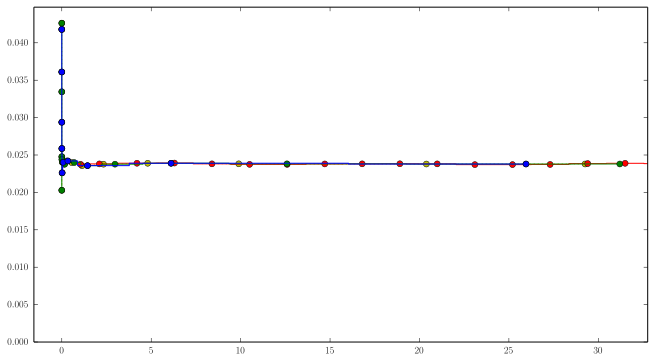

In [178]:
hist = simtf.histogram(
    ts,
    type='window',
    logscale=True,
    n_points=20,
    window_size=0.1,
)

hist_lin = simtf.histogram(
    ts,
    type='window',
    logscale=False,
    n_points=20,
    window_size=0.1,
    is_relative_window=True,
)

hist_x = simtf.histogram(
    ts,
    type='window_2',
    logscale=True,
    n_points=9,
    window_size=0.1,
    is_relative_window=True,
)

# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(hist['coo'], y, 'y:o')
plt.plot(hist_lin['mean'], hist_lin['n_delta_normalized'], 'ro-', drawstyle='steps-mid')
# plt.plot(hist_lin['mean'], hist_lin['n_normalized'], 'ro-', drawstyle='steps-mid')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.plot(hist_x['mean'], hist_x['n_delta_normalized'], 'bo-', drawstyle='steps-mid')
plt.show()

In [104]:
import math
ts = pd.Series(
    np.arange(1000000)
).apply(math.sin)

In [28]:
hist_spline = simtf.cubic_spline(xi=hist['mean'].as_matrix(),
                   yi=hist['n_delta_normalized'].as_matrix())
x_hist = np.arange(min_x-0.1, max_x+0.1, (max_x-min_x)/100)
y_hist = np.vectorize(hist_spline)(x_hist)

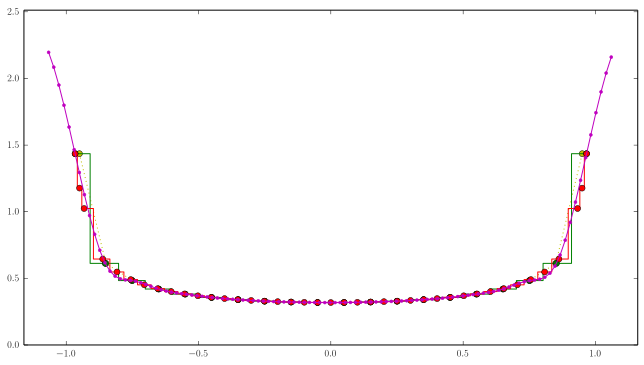

In [43]:
hist = simtf.histogram(
    ts,
    type='means',
#     type='discrete',
#     type='window',
#     type='window_2',
    logscale=False,
    n_bins=20,
    n_points=20,
    window_size=0.1,
)

hist_1 = simtf.histogram(
    ts,
#     type='mean',
#     type='discrete',
    type='window',
#     type='window_2',
    logscale=False,
    n_bins=40,
    n_points=40,
    window_size=0.1,
)

# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.10*d_x, max_x+0.10*d_x])
plt.ylim([0.0, max_y+0.75*d_y])
plt.plot(hist['coo'], y, 'y:o')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.plot(hist_1['mean'], hist_1['n_delta_normalized'], 'ro-', drawstyle='steps-mid')
plt.plot(x_hist, y_hist, 'm.-')
plt.show()

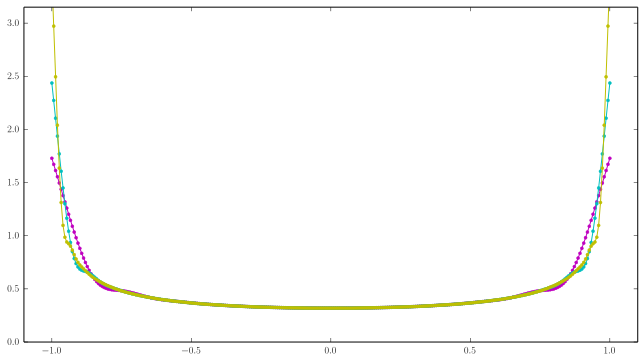

In [132]:
hist = simtf.histogram(
    ts,
    type='means',
#     type='discrete',
#     type='window',
#     type='window_2',
    logscale=False,
    n_bins=20,
    n_points=20,
    window_size=0.10,
)
hist_spline_a = simtf.cubic_spline(xi=hist['mean'].as_matrix(),
                   yi=hist['n_delta_normalized'].as_matrix())
hist = simtf.histogram(
    ts,
    type='means',
#     type='discrete',
#     type='window',
#     type='window_2',
    logscale=False,
    n_bins=40,
    n_points=40,
    window_size=0.05,
)
hist_spline_b = simtf.cubic_spline(xi=hist['mean'].as_matrix(),
                   yi=hist['n_delta_normalized'].as_matrix())
hist = simtf.histogram(
    ts,
    type='means',
#     type='discrete',
#     type='window',
#     type='window_2',
    logscale=False,
    n_bins=80,
    n_points=80,
    window_size=0.05,
)
hist_spline_c = simtf.cubic_spline(xi=hist['mean'].as_matrix(),
                   yi=hist['n_delta_normalized'].as_matrix())
min_x = -1.0
max_x = +1.0
min_y = 0.0
# max_y = max(hist_spline(min_x), hist_spline(max_x))
max_y = 3.0
x_hist = np.linspace(min_x, max_x, 300)
y_hist_a = np.vectorize(hist_spline_a)(x_hist)
y_hist_b = np.vectorize(hist_spline_b)(x_hist)
y_hist_c = np.vectorize(hist_spline_c)(x_hist)

d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(x_hist, y_hist_a, 'm.-')
plt.plot(x_hist, y_hist_b, 'c.-')
plt.plot(x_hist, y_hist_c, 'y.-')
plt.show()

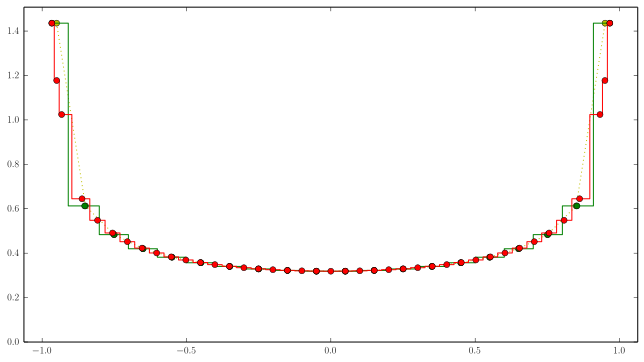

In [99]:
hist = simtf.histogram(
    ts,
    type='means',
#     type='discrete',
#     type='window',
#     type='window_2',
    logscale=False,
    n_bins=20,
    n_points=20,
    window_size=0.1,
)

hist_1 = simtf.histogram(
    ts,
#     type='mean',
#     type='discrete',
    type='window',
#     type='window_2',
    logscale=False,
    n_bins=40,
    n_points=40,
    window_size=0.1,
)

# x = hist['coo']
x = hist['mean']
y = hist['n_delta_normalized']
min_x, max_x, = x.min(), x.max(),
min_y, max_y, = y.min(), y.max(),
# Для d_y считаем, что он равен длине интервала (0, max_y)
d_x, d_y, = max_x-min_x, max_y,

plt.xlim([min_x-0.05*d_x, max_x+0.05*d_x])
plt.ylim([0.0, max_y+0.05*d_y])
plt.plot(hist['coo'], y, 'y:o')
plt.plot(x, y, 'go-', drawstyle='steps-mid')
plt.plot(hist_1['mean'], hist_1['n_delta_normalized'], 'ro-', drawstyle='steps-mid')
plt.show()

In [77]:
simtf.log_mean_integrate(lambda x: math.sin(math.pi*x), 0.1, 0.9, n=100000)

(0.49999999999027817, 0.6054613828903695)

In [84]:
# np.array([[1.0, 2.0, 3.0], [9.0, 8.0, 7.0]]).tofile('arr.bin')
np.array([[1.0, 2.0, 3.0], [9.0, 8.0, 7.0]]).byteswap()

array([[  3.03865194e-319,   3.16202013e-322,   1.04346664e-320],
       [  4.33196758e-320,   4.07900597e-320,   3.57308275e-320]])

In [ ]:
# g = simtf.cubic_spline(np.array([1., 2., 3., ]), np.array([0.5, 0.1, 1.0]))
g(2.5)